In [36]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

plt.style.use('fivethirtyeight')
warnings.filterwarnings('ignore')
matplotlib.rcParams.update({'font.size': 14})

In [37]:
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

In [38]:
TRAIN_DATASET_PATH = 'E:/train.csv'
TEST_DATASET_PATH = 'E:/test.csv'

In [39]:
# импортируем данные для обучения модели
data = pd.read_csv(TRAIN_DATASET_PATH, index_col=0, encoding='utf-8')

In [40]:
# выведем на экран первые 5 записей
data.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
Id,,,,,,,,,,,,,,,,,,,
11809,27,3.0,115.027311,NaN,10.0,4,10.0,2014,0.075424,B,B,11,3097,0,NaN,0,0,B,305018.871089
3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,B,B,30,6207,1,1183.0,1,0,B,177734.553407
8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,B,B,33,5261,0,240.0,3,1,B,282078.720850
2352,1,1.0,40.409907,NaN,1.0,10,22.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,168106.007630
13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,B,B,33,8667,2,NaN,0,6,B,343995.102962


In [41]:
# выведем информацию о данных и проверим наличие пропусков
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 11809 to 7202
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DistrictId     10000 non-null  int64  
 1   Rooms          10000 non-null  float64
 2   Square         10000 non-null  float64
 3   LifeSquare     7887 non-null   float64
 4   KitchenSquare  10000 non-null  float64
 5   Floor          10000 non-null  int64  
 6   HouseFloor     10000 non-null  float64
 7   HouseYear      10000 non-null  int64  
 8   Ecology_1      10000 non-null  float64
 9   Ecology_2      10000 non-null  object 
 10  Ecology_3      10000 non-null  object 
 11  Social_1       10000 non-null  int64  
 12  Social_2       10000 non-null  int64  
 13  Social_3       10000 non-null  int64  
 14  Healthcare_1   5202 non-null   float64
 15  Helthcare_2    10000 non-null  int64  
 16  Shops_1        10000 non-null  int64  
 17  Shops_2        10000 non-null  object 
 18  Pri

In [42]:
num_feat = list(data.select_dtypes(exclude='object').columns)
obj_feat = list(data.select_dtypes(include='object').columns)
target = 'Price'

In [43]:
num_feat

['DistrictId',
 'Rooms',
 'Square',
 'LifeSquare',
 'KitchenSquare',
 'Floor',
 'HouseFloor',
 'HouseYear',
 'Ecology_1',
 'Social_1',
 'Social_2',
 'Social_3',
 'Healthcare_1',
 'Helthcare_2',
 'Shops_1',
 'Price']

In [44]:
obj_feat

['Ecology_2', 'Ecology_3', 'Shops_2']

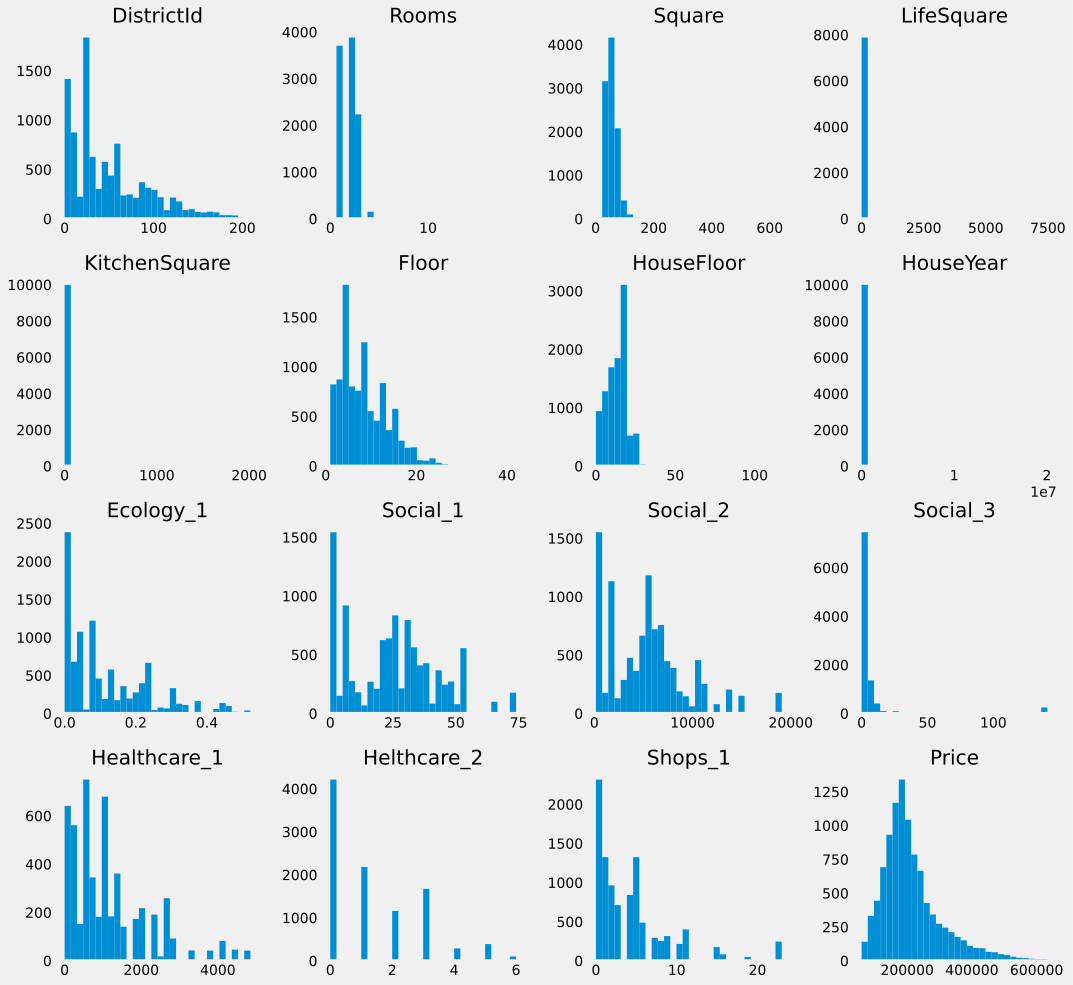

In [45]:
data[num_feat].hist(figsize=(16,16), bins=30, grid=False)
plt.show()

In [46]:
# заполним пропуски нулями
cleared_data = data.fillna(0)

In [47]:
X = cleared_data.drop(labels=['Price'], axis=1)
X = pd.get_dummies(data=X, columns=['DistrictId', 'Ecology_2', 'Ecology_3', 'Shops_2'], drop_first=True)
y = cleared_data['Price'].values

In [48]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

In [49]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)

In [51]:
model_dict = {
   'lr': LinearRegression(),
   'knn': KNeighborsRegressor(),
   'rf': RandomForestRegressor(random_state=42)
}

score_list = []

for model in model_dict:
    model_dict[model].fit(X_train_scaled, y_train)
    y_pred_train = model_dict[model].predict(X_train_scaled)
    y_pred_valid = model_dict[model].predict(X_valid_scaled)
    score_train = r2_score(y_train, y_pred_train)
    score_valid = r2_score(y_valid, y_pred_valid)
    score_list.append((score_train, score_valid))

for model, scores in zip(model_dict.keys(), score_list):
    print(f'{model}: \n\ttrain: {np.round(scores[0], 4)} \n\tvalid: {np.round(scores[1], 4)}')

lr: 
	train: 0.6573 
	valid: 0.6184
knn: 
	train: 0.7467 
	valid: 0.5918
rf: 
	train: 0.962 
	valid: 0.7343


In [16]:
#лучший результат показала модель RandomForest R^2 = 0.7343

In [52]:
# очистим данные
cleared_data = data[data['Rooms'] < 10]
cleared_data = cleared_data[cleared_data['Square'] < 250]
cleared_data = cleared_data[cleared_data['HouseFloor'] < 100]

In [53]:
# напишем функцию для предобработки данных
def preproc(df_input, dummy_features=None):
    
    df_output = df_input.copy()
        
    Square = dict(df_output.groupby('Rooms')['Square'].median())
    idx = (df_output['Square'] < 15) & (df_output['Rooms'] < 2)
    df_output.loc[idx, 'Square'] = df_output.loc[idx, 'Rooms'].apply(lambda x: Square[x])
    
    idx = (df_output['Square'] < 30) & (df_output['Rooms'] > 1)
    df_output.loc[idx, 'Square'] = df_output.loc[idx, 'Rooms'].apply(lambda x: Square[x])
    
    idx = (df_output['Square'] < df_output['LifeSquare'])
    df_output.loc[idx, 'Square'] = df_output.loc[idx, 'LifeSquare']

    LifeSquare = dict(df_output.groupby('Rooms')['LifeSquare'].median())
    idx = (df_output['LifeSquare'].isnull())
    df_output.loc[idx, 'LifeSquare'] = df_output.loc[idx, 'Rooms'].apply(lambda x: LifeSquare[x])

    idx = (df_output['Rooms'] < 1)
    df_output.loc[idx, 'KitchenSquare'] = 0.0
    
    KitchenSquare = dict(df_output.groupby('Rooms')['KitchenSquare'].median())
    idx = (df_output['Rooms'] > 0)
    df_output.loc[idx, 'KitchenSquare'] = df_output.loc[idx, 'Rooms'].apply(lambda x: KitchenSquare[x])
    
    idx = (df_output['HouseFloor'] < df_output['Floor'])
    df_output.loc[idx, 'HouseFloor'] = df_output.loc[idx, 'Floor']
    
    idx = (df_output['HouseYear'] >= 2019)
    df_output.loc[idx, 'HouseYear'] = 2019
   
    df_output['Healthcare_1'].fillna(df_output['Healthcare_1'].median(), inplace=True)
    
    df_output['Ecology_2'] = df_output['Ecology_2'].apply(lambda x: 1 if x == 'A' else 0)
    df_output['Ecology_3'] = df_output['Ecology_3'].apply(lambda x: 1 if x == 'A' else 0)
    df_output['Shops_2'] = df_output['Shops_2'].apply(lambda x: 1 if x == 'A' else 0)
    
    if dummy_features != None:
        df_output = pd.get_dummies(data=df_output, columns=dummy_features, drop_first=True)
    
    return df_output

In [54]:
# предобработаем данные для использования в модели
processed_data = preproc(cleared_data, dummy_features=None)

In [55]:
X = processed_data.drop(labels=['DistrictId', 'Price'], axis=1)
y = processed_data['Price'].values

In [56]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

In [57]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)

In [58]:
# проведем настройку гиперпараметров модели с помощью RandomizedSearchCV
rf = RandomForestRegressor(random_state=42, n_jobs=-1)

random_grid = {
    'n_estimators': np.arange(200, 501, 20),
    'max_depth': np.arange(2, 51, 2),
    'max_features': [0.5, 0.6, 0.7, 0.8, 0.9],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10]
}

random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=random_grid,
    n_iter=50,
    scoring='r2',
    cv=10,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train_scaled, y_train)

print(random_search.best_score_)
print(random_search.best_params_)

Fitting 10 folds for each of 50 candidates, totalling 500 fits
0.7250705411570675
{'n_estimators': 400, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 0.5, 'max_depth': 26}


In [59]:
# измерим качество подобранной модели на отложенной выборке
y_pred_train = random_search.best_estimator_.predict(X_train_scaled)
y_pred_valid = random_search.best_estimator_.predict(X_valid_scaled)

score_train = r2_score(y_train, y_pred_train)
score_valid = r2_score(y_valid, y_pred_valid)

print(f'train: {np.round(score_train, 4)}\nvalid: {np.round(score_valid, 4)}')

train: 0.9385
valid: 0.7167


In [60]:
# обучим подобранную модель на всех тренировочных данных

scaler = MinMaxScaler()

X_scaled = scaler.fit_transform(X)

model = RandomForestRegressor(
    n_estimators=400,
    max_depth=26,
    max_features=0.5,
    min_samples_leaf=1,
    min_samples_split=5,
    random_state=42,
    n_jobs=-1
)

model.fit(X_scaled, y)

scores = cross_val_score(model, X_scaled, y, scoring='r2', cv=10, n_jobs=-1)

print(f'cv mean: {np.round(np.mean(scores), 4)}')
print(f'cv std:  {np.round(np.std(scores), 4)}')

cv mean: 0.7333
cv std:  0.0259


In [61]:
# загрузим неразмеченные данные для предсказания

new_data = pd.read_csv(TEST_DATASET_PATH, index_col=0, encoding='utf-8')

In [62]:
# убедимся, что данные загрузились

new_data.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
Id,,,,,,,,,,,,,,,,,,
4567,44,1.0,36.847630,19.094182,5.0,5,9.0,1970,0.036122,B,B,24,4378,0,1036.0,1,1,B
5925,62,1.0,42.493907,42.568133,10.0,7,17.0,2017,0.072158,B,B,2,629,1,NaN,0,0,A
960,27,2.0,59.463678,NaN,9.0,19,19.0,1977,0.211401,B,B,9,1892,0,NaN,0,1,B
3848,23,3.0,49.646030,33.893825,6.0,2,2.0,1965,0.014073,B,B,2,475,0,NaN,0,0,B
746,74,1.0,53.837056,NaN,1.0,8,17.0,1977,0.309479,B,B,35,7715,4,990.0,0,6,B


In [63]:
# обработаем новые данные тем же спопосбом, что и данные на которых обучали модель

processed_new_data = preproc(new_data, dummy_features=None)

In [64]:
X_new = processed_new_data.drop(labels=['DistrictId'], axis=1)

In [65]:
# масштабируем новые данные подготовленным на тренировочных данных объектом класса MinMaxScaler

X_new_scaled = scaler.transform(X_new)

In [66]:
# предскажем цены квартир для новых наблюдений

y_pred_new = model.predict(X_new_scaled)

In [67]:
# запишем id объекта и предсказанную цену в датафрейм

predictions = pd.DataFrame({
    'Id': X_new.index,
    'Price': y_pred_new
})

In [68]:
predictions.head()

,Id,Price
0,4567,156872.291111
1,5925,111278.186395
2,960,138378.182629
3,3848,128449.367029
4,746,226421.378848


In [69]:
predictions.tail()

,Id,Price
4995,10379,177801.796369
4996,16138,401769.039682
4997,3912,143940.489228
4998,5722,194123.165887
4999,11004,264853.302280


In [70]:
# сохраним предсказания в csv файл

predictions.to_csv('APupyshev_predictions.csv', sep=',', index=False, encoding='utf-8')